# Support Vector Classifier

#### These results test our library against N-dimensional normal distributions centered at different vectors.
#### We compare it to the scikit-learn SVC library, both in terms of time and accuracy
#### We vary the number of samples, the dimension of the samples, the number of processes and subprocesses to invoke, the number of classes, and various tuning parameters internal to the SVC

In [1]:
import numpy as np
from svc2 import SVC
import time
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import sklearn.svm as skl

### Function for generating M samples in N dimensions for C classes

In [2]:
def gen_ndim_norm(N, M, C, space):
    # map class label to its normal distb ctr.
    def loc_func(i):
        return i * space
    
    partition = int(M / C) # each class will have this many samples
    mat = np.zeros((partition*C, N))
    for i in range(C):
        for j in range(partition):
            mat[(i*partition) + j, :] = np.random.normal(loc=loc_func(i), scale = 1, size=N)
    return mat

In [3]:
def gen_labels(M, C):
    # create a 1 dimensional ndarray like: [0,0,0,1,1,1] if M was 6 and c was 2
    partition = int(M / C)
    y = np.zeros(partition * C)
    for i in range(C):
        y[i*partition:i*partition+partition] = np.repeat(i, partition)
    return y

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


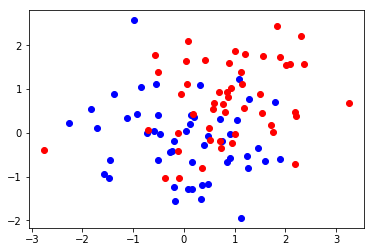

In [4]:
# Here's an example of 2 classes of totalling 100 samples in 2 dimensions
x = gen_ndim_norm(N = 2, M = 100, C = 2, space=1)
y = gen_labels(M = 100, C = 2)
print(y)
plt.plot(x[:50, 0], x[:50, 1], 'bo')
plt.plot(x[50:, 0], x[50:, 1], 'ro')

### Now we are going to generate many of these samples by varying some parameters. We train an SVC instance on each dataset and report the training time and accuracy for each. 

#### Here is a function to get the accuracy of the prediction

In [5]:
def accuracy(y, yhat):
    return round(sum(y==yhat) / y.shape[0], 3)

In [6]:


dimensions = [1, 5, 10, 20, 50, 100, 300, 1000]
samples = [100, 200, 500, 1000, 2000, 5000]
min_dims = [1, 5, 10, 20, 30]
min_samples = [100, 200, 500]
labels = 2
tols = [100, 0.001]
spaces = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for d in min_dims:
    for s in min_samples:
        x = gen_ndim_norm(N = d, M = s, C = labels, space=1)
        y = gen_labels(s, labels)
        x, y = shuffle(x, y)
        clf = SVC()
        start = time.time()
        clf.fit(x, y)
        train_time = round(time.time() - start, 3)
        yhat = clf.predict(x)
        acc = accuracy(y, yhat)
        sk = skl.SVC(max_iter=1)
        start = time.time()
        sk.fit(x, y)
        sk_train_time = time.time() - start
        yhat = sk.predict(x)
        sk_acc = accuracy(yhat, y)
        print("Samples: " + str(s) + "  Dims: " + str(d) + "  Accuracy: " + str(acc) + "  Train Time: " + str(train_time) + "   sklearn acc:" + str(sk_acc) + "  Train time: " + str(sk_train_time))

Samples: 100  Dims: 1  Accuracy: 0.69  Train Time: 0.066   sklearn acc:0.45  Train time: 0.006380796432495117


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 200  Dims: 1  Accuracy: 0.6  Train Time: 0.086   sklearn acc:0.425  Train time: 0.002789020538330078


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 500  Dims: 1  Accuracy: 0.628  Train Time: 0.219   sklearn acc:0.338  Train time: 0.002997875213623047


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 100  Dims: 5  Accuracy: 0.82  Train Time: 0.073   sklearn acc:0.59  Train time: 0.002820730209350586


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 200  Dims: 5  Accuracy: 0.88  Train Time: 0.097   sklearn acc:0.6  Train time: 0.003154277801513672


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 500  Dims: 5  Accuracy: 0.878  Train Time: 0.232   sklearn acc:0.472  Train time: 0.002865314483642578


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 100  Dims: 10  Accuracy: 0.89  Train Time: 0.082   sklearn acc:0.9  Train time: 0.002833127975463867


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 200  Dims: 10  Accuracy: 0.95  Train Time: 0.088   sklearn acc:0.58  Train time: 0.0031387805938720703


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 500  Dims: 10  Accuracy: 0.948  Train Time: 0.232   sklearn acc:0.536  Train time: 0.003025054931640625


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 100  Dims: 20  Accuracy: 1.0  Train Time: 0.077   sklearn acc:0.82  Train time: 0.004598140716552734


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 200  Dims: 20  Accuracy: 0.99  Train Time: 0.101   sklearn acc:0.87  Train time: 0.002741098403930664


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 500  Dims: 20  Accuracy: 0.978  Train Time: 0.21   sklearn acc:0.814  Train time: 0.0027730464935302734


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 100  Dims: 30  Accuracy: 0.98  Train Time: 0.077   sklearn acc:0.8  Train time: 0.0032241344451904297


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 200  Dims: 30  Accuracy: 0.995  Train Time: 0.11   sklearn acc:0.865  Train time: 0.0026531219482421875


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Samples: 500  Dims: 30  Accuracy: 0.994  Train Time: 0.334   sklearn acc:0.85  Train time: 0.003017902374267578


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


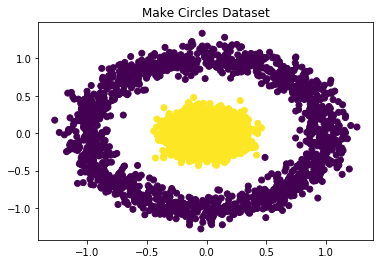

In [31]:
from sklearn.datasets.samples_generator import make_circles

import matplotlib.pyplot as plt
from svc2 import SVC
import sklearn.svm as skl
num_samples = 3000
x, y = make_circles(num_samples, factor=0.2, noise=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Make Circles Dataset")
plt.show()

# s = SVC(kernel_type="rbf", gamma=3)
# s.fit(x, y)
# yhat = s.predict(x)
# acc1 = sum(yhat == y) / num_samples
# print(acc1)


# s2 = skl.SVC(kernel="rbf")
# s2.fit(x, y)
# yhat2 = s2.predict(x)
# acc2 = sum(yhat2 == y) / num_samples
# print(acc2)

In [25]:
from sklearn.datasets import make_multilabel_classification
x, y = make_multilabel_classification(n_samples = 200, n_features = 5, n_classes = 2)
s = SVC(kernel_type="rbf", gamma=3)
s.fit(x, y)
yhat = s.predict(x)
acc1 = sum(yhat == y) / 200
print(acc1)

s2 = skl.SVC(kernel="rbf")
s2.fit(x, y)
yhat2 = s2.predict(x)
acc2 = sum(yhat2 == y) / 200
print(acc2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()